#Deep Learning With Computer Vision And Advanced NLP (DL_CV_NLP)

$$ Revision Notes $$
$$ A-Note-by-**Bappy Ahmed** $$

# Implementation of ANN using Keras:

In [6]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [7]:
# Checking version of Tensorflow ans Keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.1.0
Keras Version 2.2.4-tf


# GPU / CPU Check

In [8]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [9]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [10]:
check_list = ['GPU','CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available!")
    print(f"Details >> {out}")
  else:
    print(f"{device} isn't available!")

GPU is available!
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


#Creating a simple classifier using keras on MNIST data

In [11]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [12]:
print(f"data type of X_train_full: {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
 shape of X_train_full: (60000, 28, 28)


In [13]:
X_test.shape

(10000, 28, 28)

In [14]:
len(X_test[1][0])

28

## Creating a validation data set from the full training data 

In [15]:

# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.


In [16]:
len(X_train_full[5000:] )

55000

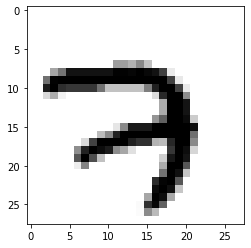

In [17]:
# Lets view some data 
plt.imshow(X_train[0], cmap="binary")
plt.show()

<AxesSubplot:>

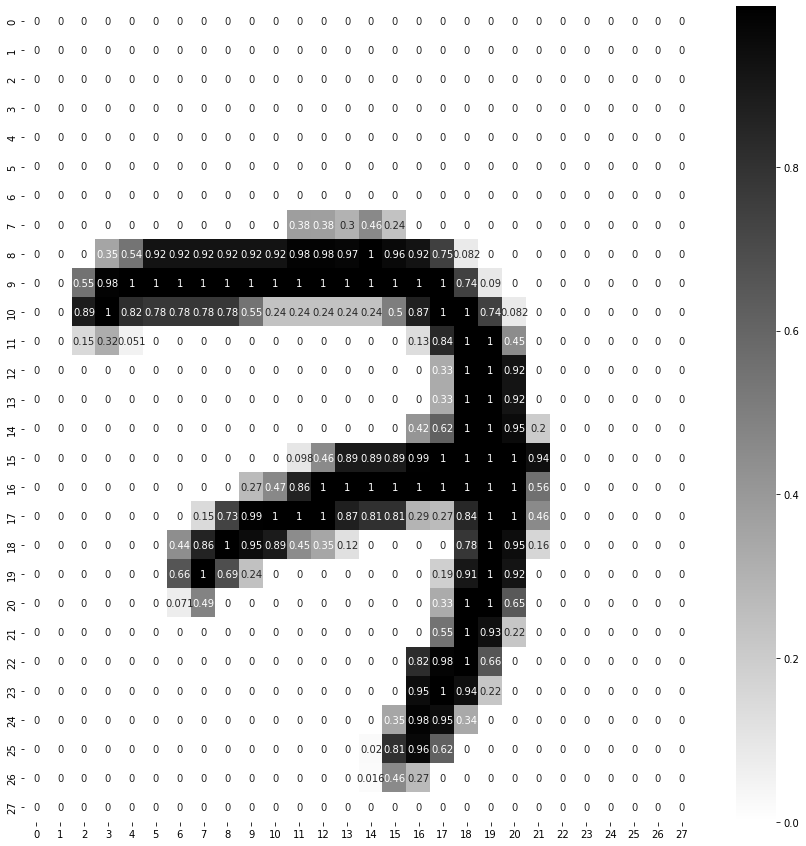

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

## Creating layers of ANN

In [19]:

LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

In [20]:
model_clf.layers

In [21]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
# firsLayer * secondLayer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [23]:
# Total parameters to be trained 
sum((235500, 30100, 1010))

266610

In [24]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [25]:
len(hidden1.get_weights()[1])

300

In [26]:
hidden1.get_weights()

[array([[-0.02756585, -0.05997081, -0.06191756, ..., -0.06765595,
         -0.01626219, -0.03465546],
        [-0.01312622,  0.05589429, -0.04647898, ...,  0.06824426,
         -0.00975233,  0.03042329],
        [-0.06743276, -0.05279156,  0.06652652, ...,  0.04784665,
         -0.00240319, -0.07249961],
        ...,
        [ 0.02027439, -0.02560855,  0.00525989, ...,  0.01977398,
          0.03456803,  0.01445378],
        [ 0.02530949, -0.03829926,  0.02240926, ...,  0.03940317,
          0.01166007, -0.06411846],
        [ 0.04170244,  0.02978262, -0.0465125 , ...,  0.02921272,
          0.00652267,  0.01782924]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [27]:
weights, biases = hidden1.get_weights()

In [28]:
print("shape\n",weights.shape, "\n")
weights

shape
 (784, 300) 



array([[-0.02756585, -0.05997081, -0.06191756, ..., -0.06765595,
        -0.01626219, -0.03465546],
       [-0.01312622,  0.05589429, -0.04647898, ...,  0.06824426,
        -0.00975233,  0.03042329],
       [-0.06743276, -0.05279156,  0.06652652, ...,  0.04784665,
        -0.00240319, -0.07249961],
       ...,
       [ 0.02027439, -0.02560855,  0.00525989, ...,  0.01977398,
         0.03456803,  0.01445378],
       [ 0.02530949, -0.03829926,  0.02240926, ...,  0.03940317,
         0.01166007, -0.06411846],
       [ 0.04170244,  0.02978262, -0.0465125 , ...,  0.02921272,
         0.00652267,  0.01782924]], dtype=float32)

In [29]:
print("shape\n", biases.shape)

shape
 (300,)


### Defining our Model

In [30]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


### Training our Model

In [ ]:
# training

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 117s 2ms/sample - loss: 0.6203 - accuracy: 0.8412 - val_loss: 0.3073 - val_accuracy: 0.9162
Epoch 2/30
55000/55000 [==============================] - 5s 89us/sample - loss: 0.2830 - accuracy: 0.9195 - val_loss: 0.2364 - val_accuracy: 0.9358
Epoch 3/30
55000/55000 [==============================] - 5s 89us/sample - loss: 0.2310 - accuracy: 0.9340 - val_loss: 0.2030 - val_accuracy: 0.9444
Epoch 4/30
55000/55000 [==============================] - 5s 92us/sample - loss: 0.1983 - accuracy: 0.9434 - val_loss: 0.1778 - val_accuracy: 0.9508
Epoch 5/30
55000/55000 [==============================] - 5s 90us/sample - loss: 0.1744 - accuracy: 0.9499 - val_loss: 0.1631 - val_accuracy: 0.9558
Epoch 6/30
55000/55000 [==============================] - 5s 88us/sample - loss: 0.1553 - accuracy: 0.9558 - val_loss: 0.1486 - val_accuracy: 0.9598
Epoch 7/30
55000/55000 [==============================] 

In [ ]:
history.params

In [ ]:
pd.DataFrame(history.history)

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model_clf.evaluate(X_test, y_test)

In [ ]:
x_new = X_test[:3]
# x_new

In [ ]:
actual = y_test[:3]
actual

### Probability starting from 0

In [ ]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

In [ ]:
y_prob

In [ ]:
y_pred = np.argmax(y_prob, axis = -1)

In [ ]:
y_pred

In [ ]:
actual

In [ ]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show() 
  print("######################")